# Scraping Harry Potter Numbers

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
url = 'https://www.the-numbers.com/movies/franchise/Harry-Potter#tab=summary'

In [3]:
page = requests.get(url).content
page_soup = BeautifulSoup(page, 'html.parser')
page_soup

<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-1343128-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-1343128-1');
</script>
<meta content='(PICS-1.1 "https://www.icra.org/ratingsv02.html" l gen true for "https://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "https://www.rsac.org/ratingsv01.html" l gen true for "https://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))' http-equiv="PICS-Label"/>
<!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="telephone=no" name="format-detection"/> <!-- for apple mobile -->
<meta content="521546213" property="fb:admins">
<script crossorigin="anonymou

In [4]:
numbers_summary = page_soup.find('table',{'id':'franchise_movies_overview'})
table_rows= numbers_summary.select('table tbody tr')

release_date = []
for elem in table_rows: # we expect all rows
    release_date.append(elem.find_all('td')[0].getText())

print(release_date)

['Nov 12, 2021', 'Nov 16, 2018', 'Nov 18, 2016', 'Oct 14, 2016', 'Jul 15, 2011', 'Nov 19, 2010', 'Jul 15, 2009', 'Jul 11, 2007', 'Nov 18, 2005', 'Jun 4, 2004', 'Nov 15, 2002', 'Nov 16, 2001']


In [5]:
movies = []
for elem in table_rows: # we expect all rows
    movies.append(elem.find_all('td')[1].getText())

print(movies)

['Fantastic Beasts and Where …', 'Fantastic Beasts: The Crime…', 'Fantastic Beasts and Where …', 'The Harry Potter IMAX Marathon', 'Harry Potter and the Deathl…', 'Harry Potter and the Deathl…', 'Harry Potter and the Half-B…', 'Harry Potter and the Order …', 'Harry Potter and the Goblet…', 'Harry Potter and the Prison…', 'Harry Potter and the Chambe…', 'Harry Potter and the Sorcer…']


In [6]:
production_budget = []
for elem in table_rows: 
    production_budget.append(elem.find_all('td')[2].getText())

print(production_budget)

['', '$200,000,000', '$180,000,000', '', '$125,000,000', '$125,000,000', '$250,000,000', '$150,000,000', '$150,000,000', '$130,000,000', '$100,000,000', '$125,000,000']


In [7]:
opening_weekend = []
for elem in table_rows: # we expect all rows
    opening_weekend.append(elem.find_all('td')[3].getText())

print(opening_weekend)

['', '$62,163,104', '$74,403,387', '$1,357,376', '$169,189,427', '$125,017,372', '$77,835,727', '$77,108,414', '$102,685,961', '$93,687,367', '$88,357,488', '$90,294,621']


In [8]:
domestic_boxoffice = []
for elem in table_rows: # we expect all rows
    domestic_boxoffice.append(elem.find_all('td')[4].getText())

print(domestic_boxoffice)

['', '$159,555,901', '$234,037,575', '$1,729,226', '$381,193,157', '$296,131,568', '$302,089,278', '$292,137,260', '$290,201,752', '$249,757,726', '$262,233,381', '$317,871,467']


In [9]:
worldwide_boxoffice = []
for elem in table_rows: # we expect all rows
    worldwide_boxoffice.append(elem.find_all('td')[5].getText())

print(worldwide_boxoffice)

['', '$652,220,086', '$814,037,575', '$1,729,226', '$1,341,693,157', '$960,431,568', '$935,213,767', '$943,076,457', '$897,099,794', '$795,616,337', '$879,225,135', '$975,047,606']


In [10]:
# creating a dataframe out of columns and table headers

In [11]:
summary = {'Release_Date':['2021-11', '2018-11', '2016-11', '2016-10', '2011-07', '2010-11', '2009-07', '2007-07', '2005-11', '2004-06', '2002-11', '2001-11'],
        'Title':['Fantastic Beasts and Where …', 'Fantastic Beasts: The Crime…', 'Fantastic Beasts and Where …', 'The Harry Potter IMAX Marathon', 'Harry Potter and the Deathly Hollows II', 'Harry Potter and the Deathly Hollows I', 'Harry Potter and the Half-Blood Prince', 'Harry Potter and the Order of Phoenix', 'Harry Potter and the Goblet of Fire', 'Harry Potter and the Prisoner of Askaban', 'Harry Potter and the Chamber of Secrets', 'Harry Potter and the Sorcerers Stone'],
          'Production_Budget':[0, 200000000, 180000000, 0, 125000000, 125000000, 250000000, 150000000, 150000000, 130000000, 100000000, 125000000],
          'Opening_Weekend':[0, 62163104, 74403387, 1357376, 169189427, 125017372, 77835727, 77108414, 102685961, 93687367, 88357488, 90294621],
          'Domestic_Boxoffice_Sales':[0, 159555901, 234037575, 1729226, 381193157, 296131568, 302089278, 292137260, 290201752, 249757726, 262233381, 317871467],
          'Wordwide_Boxoffice_Sales':[0, 652220086, 814037575, 1729226, 1341693157, 960431568, 935213767, 943076457, 897099794, 795616337, 879225135, 975047606]}

df_summary = pd.DataFrame(summary)
df_summary

,Release_Date,Title,Production_Budget,Opening_Weekend,Domestic_Boxoffice_Sales,Wordwide_Boxoffice_Sales
0,2021-11,Fantastic Beasts and Where …,0,0,0,0
1,2018-11,Fantastic Beasts: The Crime…,200000000,62163104,159555901,652220086
2,2016-11,Fantastic Beasts and Where …,180000000,74403387,234037575,814037575
3,2016-10,The Harry Potter IMAX Marathon,0,1357376,1729226,1729226
4,2011-07,Harry Potter and the Deathly Hollows II,125000000,169189427,381193157,1341693157
5,2010-11,Harry Potter and the Deathly Hollows I,125000000,125017372,296131568,960431568
6,2009-07,Harry Potter and the Half-Blood Prince,250000000,77835727,302089278,935213767
7,2007-07,Harry Potter and the Order of Phoenix,150000000,77108414,292137260,943076457
8,2005-11,Harry Potter and the Goblet of Fire,150000000,102685961,290201752,897099794
9,2004-06,Harry Potter and the Prisoner of Askaban,130000000,93687367,249757726,795616337


In [12]:
df_summary

,Release_Date,Title,Production_Budget,Opening_Weekend,Domestic_Boxoffice_Sales,Wordwide_Boxoffice_Sales
0,2021-11,Fantastic Beasts and Where …,0,0,0,0
1,2018-11,Fantastic Beasts: The Crime…,200000000,62163104,159555901,652220086
2,2016-11,Fantastic Beasts and Where …,180000000,74403387,234037575,814037575
3,2016-10,The Harry Potter IMAX Marathon,0,1357376,1729226,1729226
4,2011-07,Harry Potter and the Deathly Hollows II,125000000,169189427,381193157,1341693157
5,2010-11,Harry Potter and the Deathly Hollows I,125000000,125017372,296131568,960431568
6,2009-07,Harry Potter and the Half-Blood Prince,250000000,77835727,302089278,935213767
7,2007-07,Harry Potter and the Order of Phoenix,150000000,77108414,292137260,943076457
8,2005-11,Harry Potter and the Goblet of Fire,150000000,102685961,290201752,897099794
9,2004-06,Harry Potter and the Prisoner of Askaban,130000000,93687367,249757726,795616337


In [13]:
# Calculate and Visualize the Numbers

In [14]:
df_releases = df_summary[4:12]

In [15]:
df_releases

,Release_Date,Title,Production_Budget,Opening_Weekend,Domestic_Boxoffice_Sales,Wordwide_Boxoffice_Sales
4,2011-07,Harry Potter and the Deathly Hollows II,125000000,169189427,381193157,1341693157
5,2010-11,Harry Potter and the Deathly Hollows I,125000000,125017372,296131568,960431568
6,2009-07,Harry Potter and the Half-Blood Prince,250000000,77835727,302089278,935213767
7,2007-07,Harry Potter and the Order of Phoenix,150000000,77108414,292137260,943076457
8,2005-11,Harry Potter and the Goblet of Fire,150000000,102685961,290201752,897099794
9,2004-06,Harry Potter and the Prisoner of Askaban,130000000,93687367,249757726,795616337
10,2002-11,Harry Potter and the Chamber of Secrets,100000000,88357488,262233381,879225135
11,2001-11,Harry Potter and the Sorcerers Stone,125000000,90294621,317871467,975047606


In [16]:
df_releases['Dom_DVD_Sales'] = [102461187, 95762486, 148064710, 254270750, 542640844, 0, 0, 0]
df_releases

/usr/local/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Release_Date,Title,Production_Budget,Opening_Weekend,Domestic_Boxoffice_Sales,Wordwide_Boxoffice_Sales,Dom_DVD_Sales
4,2011-07,Harry Potter and the Deathly Hollows II,125000000,169189427,381193157,1341693157,102461187
5,2010-11,Harry Potter and the Deathly Hollows I,125000000,125017372,296131568,960431568,95762486
6,2009-07,Harry Potter and the Half-Blood Prince,250000000,77835727,302089278,935213767,148064710
7,2007-07,Harry Potter and the Order of Phoenix,150000000,77108414,292137260,943076457,254270750
8,2005-11,Harry Potter and the Goblet of Fire,150000000,102685961,290201752,897099794,542640844
9,2004-06,Harry Potter and the Prisoner of Askaban,130000000,93687367,249757726,795616337,0
10,2002-11,Harry Potter and the Chamber of Secrets,100000000,88357488,262233381,879225135,0
11,2001-11,Harry Potter and the Sorcerers Stone,125000000,90294621,317871467,975047606,0


In [17]:
movie_numbers = pd.DataFrame(df_releases)
movie_numbers

,Release_Date,Title,Production_Budget,Opening_Weekend,Domestic_Boxoffice_Sales,Wordwide_Boxoffice_Sales,Dom_DVD_Sales
4,2011-07,Harry Potter and the Deathly Hollows II,125000000,169189427,381193157,1341693157,102461187
5,2010-11,Harry Potter and the Deathly Hollows I,125000000,125017372,296131568,960431568,95762486
6,2009-07,Harry Potter and the Half-Blood Prince,250000000,77835727,302089278,935213767,148064710
7,2007-07,Harry Potter and the Order of Phoenix,150000000,77108414,292137260,943076457,254270750
8,2005-11,Harry Potter and the Goblet of Fire,150000000,102685961,290201752,897099794,542640844
9,2004-06,Harry Potter and the Prisoner of Askaban,130000000,93687367,249757726,795616337,0
10,2002-11,Harry Potter and the Chamber of Secrets,100000000,88357488,262233381,879225135,0
11,2001-11,Harry Potter and the Sorcerers Stone,125000000,90294621,317871467,975047606,0


In [18]:
movie_numbers['Dom_BRAY_Sales'] = [60066364,61118715, 51295786, 5206421, 6237064, 0, 0, 0]


In [19]:
movie_numbers['Total_Dom_Video_Sales'] = movie_numbers['Dom_BRAY_Sales'] + movie_numbers['Dom_DVD_Sales']
movie_numbers

,Release_Date,Title,Production_Budget,Opening_Weekend,Domestic_Boxoffice_Sales,Wordwide_Boxoffice_Sales,Dom_DVD_Sales,Dom_BRAY_Sales,Total_Dom_Video_Sales
4,2011-07,Harry Potter and the Deathly Hollows II,125000000,169189427,381193157,1341693157,102461187,60066364,162527551
5,2010-11,Harry Potter and the Deathly Hollows I,125000000,125017372,296131568,960431568,95762486,61118715,156881201
6,2009-07,Harry Potter and the Half-Blood Prince,250000000,77835727,302089278,935213767,148064710,51295786,199360496
7,2007-07,Harry Potter and the Order of Phoenix,150000000,77108414,292137260,943076457,254270750,5206421,259477171
8,2005-11,Harry Potter and the Goblet of Fire,150000000,102685961,290201752,897099794,542640844,6237064,548877908
9,2004-06,Harry Potter and the Prisoner of Askaban,130000000,93687367,249757726,795616337,0,0,0
10,2002-11,Harry Potter and the Chamber of Secrets,100000000,88357488,262233381,879225135,0,0,0
11,2001-11,Harry Potter and the Sorcerers Stone,125000000,90294621,317871467,975047606,0,0,0


In [20]:
movie_book_sales = pd.DataFrame(movie_numbers)
movie_book_sales

,Release_Date,Title,Production_Budget,Opening_Weekend,Domestic_Boxoffice_Sales,Wordwide_Boxoffice_Sales,Dom_DVD_Sales,Dom_BRAY_Sales,Total_Dom_Video_Sales
4,2011-07,Harry Potter and the Deathly Hollows II,125000000,169189427,381193157,1341693157,102461187,60066364,162527551
5,2010-11,Harry Potter and the Deathly Hollows I,125000000,125017372,296131568,960431568,95762486,61118715,156881201
6,2009-07,Harry Potter and the Half-Blood Prince,250000000,77835727,302089278,935213767,148064710,51295786,199360496
7,2007-07,Harry Potter and the Order of Phoenix,150000000,77108414,292137260,943076457,254270750,5206421,259477171
8,2005-11,Harry Potter and the Goblet of Fire,150000000,102685961,290201752,897099794,542640844,6237064,548877908
9,2004-06,Harry Potter and the Prisoner of Askaban,130000000,93687367,249757726,795616337,0,0,0
10,2002-11,Harry Potter and the Chamber of Secrets,100000000,88357488,262233381,879225135,0,0,0
11,2001-11,Harry Potter and the Sorcerers Stone,125000000,90294621,317871467,975047606,0,0,0


In [21]:
movie_book_sales['Copys_Sold_approx'] = [65000000, 65000000, 65000000, 65000000, 65000000, 65000000, 77000000, 120000000]

In [22]:
movie_book_sales['Publishing_Date'] = ['2007-07', '2007-07', '2005-07', '2003-06','2000-07', '1999-07', '1998-07', '1997-06']

In [23]:
movie_book_sales

,Release_Date,Title,Production_Budget,Opening_Weekend,Domestic_Boxoffice_Sales,Wordwide_Boxoffice_Sales,Dom_DVD_Sales,Dom_BRAY_Sales,Total_Dom_Video_Sales,Copys_Sold_approx,Publishing_Date
4,2011-07,Harry Potter and the Deathly Hollows II,125000000,169189427,381193157,1341693157,102461187,60066364,162527551,65000000,2007-07
5,2010-11,Harry Potter and the Deathly Hollows I,125000000,125017372,296131568,960431568,95762486,61118715,156881201,65000000,2007-07
6,2009-07,Harry Potter and the Half-Blood Prince,250000000,77835727,302089278,935213767,148064710,51295786,199360496,65000000,2005-07
7,2007-07,Harry Potter and the Order of Phoenix,150000000,77108414,292137260,943076457,254270750,5206421,259477171,65000000,2003-06
8,2005-11,Harry Potter and the Goblet of Fire,150000000,102685961,290201752,897099794,542640844,6237064,548877908,65000000,2000-07
9,2004-06,Harry Potter and the Prisoner of Askaban,130000000,93687367,249757726,795616337,0,0,0,65000000,1999-07
10,2002-11,Harry Potter and the Chamber of Secrets,100000000,88357488,262233381,879225135,0,0,0,77000000,1998-07
11,2001-11,Harry Potter and the Sorcerers Stone,125000000,90294621,317871467,975047606,0,0,0,120000000,1997-06


In [24]:
# movie_book_sales.to_csv('movie_book_sales.csv')

In [25]:
movie_book_sales.Release_Date = movie_book_sales.Release_Date.astype('datetime64')

In [27]:
movie_book_sales.sort_values(by = 'Release_Date', ascending = True, inplace = True)

In [28]:
movie_book_sales

,Release_Date,Title,Production_Budget,Opening_Weekend,Domestic_Boxoffice_Sales,Wordwide_Boxoffice_Sales,Dom_DVD_Sales,Dom_BRAY_Sales,Total_Dom_Video_Sales,Copys_Sold_approx,Publishing_Date
11,2001-11-01,Harry Potter and the Sorcerers Stone,125000000,90294621,317871467,975047606,0,0,0,120000000,1997-06
10,2002-11-01,Harry Potter and the Chamber of Secrets,100000000,88357488,262233381,879225135,0,0,0,77000000,1998-07
9,2004-06-01,Harry Potter and the Prisoner of Askaban,130000000,93687367,249757726,795616337,0,0,0,65000000,1999-07
8,2005-11-01,Harry Potter and the Goblet of Fire,150000000,102685961,290201752,897099794,542640844,6237064,548877908,65000000,2000-07
7,2007-07-01,Harry Potter and the Order of Phoenix,150000000,77108414,292137260,943076457,254270750,5206421,259477171,65000000,2003-06
6,2009-07-01,Harry Potter and the Half-Blood Prince,250000000,77835727,302089278,935213767,148064710,51295786,199360496,65000000,2005-07
5,2010-11-01,Harry Potter and the Deathly Hollows I,125000000,125017372,296131568,960431568,95762486,61118715,156881201,65000000,2007-07
4,2011-07-01,Harry Potter and the Deathly Hollows II,125000000,169189427,381193157,1341693157,102461187,60066364,162527551,65000000,2007-07


In [29]:
# visualize by movie
import matplotlib 
import matplotlib.pyplot as plt

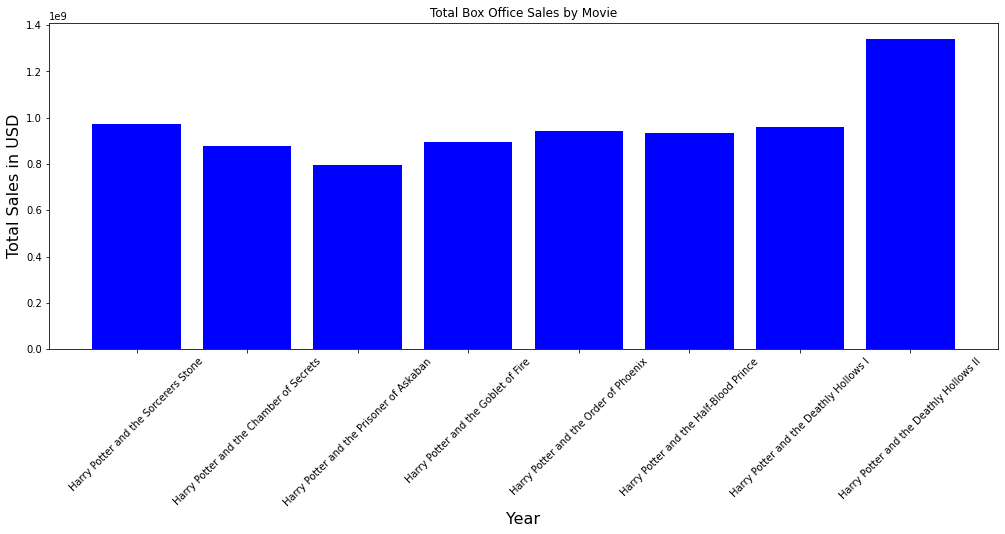

<Figure size 432x288 with 0 Axes>

In [39]:
plt.figure(figsize=(17,6))
x = movie_book_sales.Title
y = movie_book_sales.Wordwide_Boxoffice_Sales
plt.bar(x,y, color = 'blue', label = 'Total Box Office Sales')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Total Sales in USD', fontsize = 16)
plt.title('Total Box Office Sales by Movie')
plt.xticks(rotation=45)
plt.show()
plt.clf()

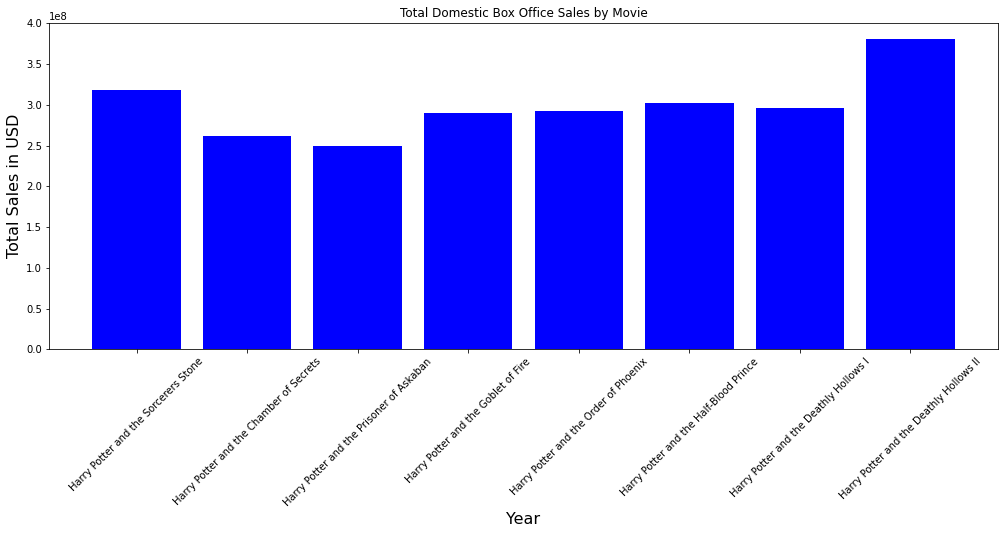

<Figure size 432x288 with 0 Axes>

In [40]:
plt.figure(figsize=(17,6))
x = movie_book_sales.Title
y = movie_book_sales.Domestic_Boxoffice_Sales
plt.bar(x,y, color = 'blue', label = 'Total Box Office Dom Sales')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Total Sales in USD', fontsize = 16)
plt.xticks(rotation=45)
plt.title('Total Domestic Box Office Sales by Movie')
plt.show()
plt.clf()

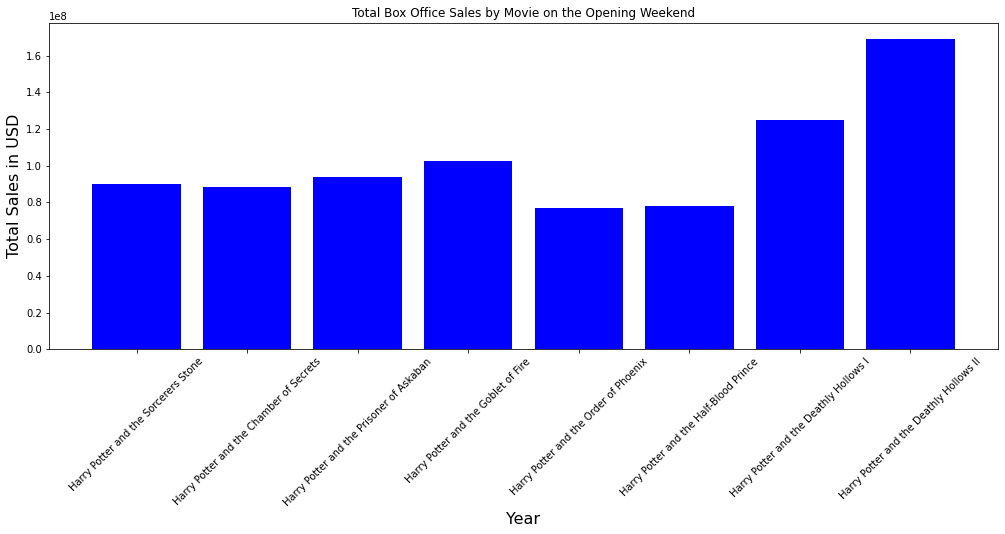

<Figure size 432x288 with 0 Axes>

In [32]:
import datetime as datetime
from pandas import Period

plt.figure(figsize=(17,6))
x = movie_book_sales.Title
y = movie_book_sales.Opening_Weekend
plt.bar(x,y, color = 'blue', label = 'Total Box Office Dom Sales')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Total Sales in USD', fontsize = 16)
plt.title('Total Box Office Sales by Movie on the Opening Weekend')
plt.xticks(rotation=45)
plt.show()
plt.clf()

In [33]:
# vizualize on a timeline with Youtube and alone

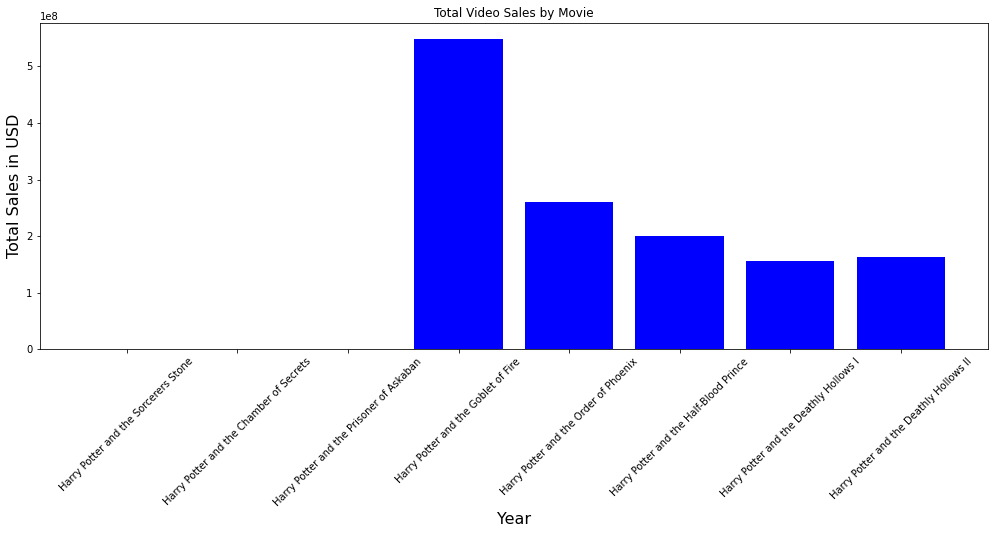

<Figure size 432x288 with 0 Axes>

In [34]:
plt.figure(figsize=(17,6))
x = movie_book_sales.Title
y = movie_book_sales.Total_Dom_Video_Sales
plt.bar(x,y, color = 'blue', label = 'Total Dom Video Sales')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Total Sales in USD', fontsize = 16)
plt.title('Total Video Sales by Movie')
plt.xticks(rotation=45)
plt.show()
plt.clf()

In [35]:
# Seperating Books and Movies

In [36]:
data_HPbooks = [movie_book_sales['Title'], movie_book_sales['Copys_Sold_approx'],movie_book_sales['Publishing_Date']]
columns_HPbooks = ['Title', 'Copies_Sold_approx','Publishing_Date']

HPbooks = pd.concat(data_HPbooks, axis=1, keys=columns_HPbooks)
HPbooks

# HPbooks.to_csv('HPbooks.csv')

,Title,Copies_Sold_approx,Publishing_Date
11,Harry Potter and the Sorcerers Stone,120000000,1997-06
10,Harry Potter and the Chamber of Secrets,77000000,1998-07
9,Harry Potter and the Prisoner of Askaban,65000000,1999-07
8,Harry Potter and the Goblet of Fire,65000000,2000-07
7,Harry Potter and the Order of Phoenix,65000000,2003-06
6,Harry Potter and the Half-Blood Prince,65000000,2005-07
5,Harry Potter and the Deathly Hollows I,65000000,2007-07
4,Harry Potter and the Deathly Hollows II,65000000,2007-07


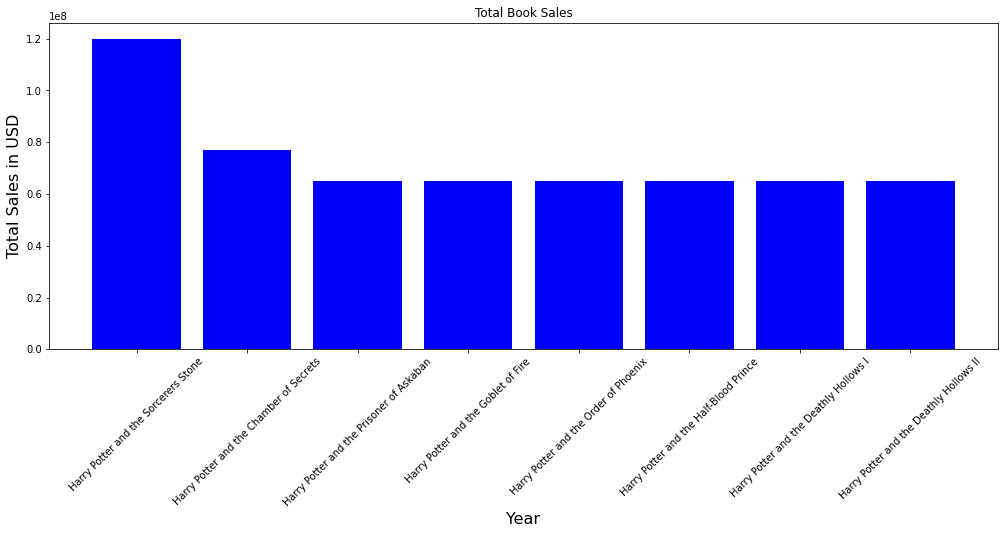

<Figure size 432x288 with 0 Axes>

In [37]:
plt.figure(figsize=(17,6))
x = HPbooks.Title
y = HPbooks.Copies_Sold_approx
plt.bar(x,y, color = 'blue', label = 'Total Copies Sold approx')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Total Sales in USD', fontsize = 16)
plt.title('Total Book Sales')
plt.xticks(rotation=45)
plt.show()
plt.clf()

In [38]:
data_HPmovies = [movie_book_sales['Release_Date'], movie_book_sales['Title'], movie_book_sales['Production_Budget'], movie_book_sales['Opening_Weekend'], movie_book_sales['Domestic_Boxoffice_Sales'], movie_book_sales['Wordwide_Boxoffice_Sales'], movie_book_sales['Dom_DVD_Sales'], movie_book_sales['Dom_BRAY_Sales'], movie_book_sales['Total_Dom_Video_Sales']]
columns_HPmovies = ['Release_Date', 'Title', 'Production_Budget', 'Opening_Weekend', 'Domestic_Boxoffice_Sales', 'Wordwide_Boxoffice_Sales', 'Dom_DVD_Sales', 'Dom_BRAY_Sales', 'Total_Dom_Video_Sales']

HPmovies = pd.concat(data_HPmovies, axis=1, keys=columns_HPmovies)
HPmovies

# HPmovies.to_csv('HPmovies.csv')

,Release_Date,Title,Production_Budget,Opening_Weekend,Domestic_Boxoffice_Sales,Wordwide_Boxoffice_Sales,Dom_DVD_Sales,Dom_BRAY_Sales,Total_Dom_Video_Sales
11,2001-11-01,Harry Potter and the Sorcerers Stone,125000000,90294621,317871467,975047606,0,0,0
10,2002-11-01,Harry Potter and the Chamber of Secrets,100000000,88357488,262233381,879225135,0,0,0
9,2004-06-01,Harry Potter and the Prisoner of Askaban,130000000,93687367,249757726,795616337,0,0,0
8,2005-11-01,Harry Potter and the Goblet of Fire,150000000,102685961,290201752,897099794,542640844,6237064,548877908
7,2007-07-01,Harry Potter and the Order of Phoenix,150000000,77108414,292137260,943076457,254270750,5206421,259477171
6,2009-07-01,Harry Potter and the Half-Blood Prince,250000000,77835727,302089278,935213767,148064710,51295786,199360496
5,2010-11-01,Harry Potter and the Deathly Hollows I,125000000,125017372,296131568,960431568,95762486,61118715,156881201
4,2011-07-01,Harry Potter and the Deathly Hollows II,125000000,169189427,381193157,1341693157,102461187,60066364,162527551
